In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os

# Import Data

In [2]:
df = pd.read_csv("data/ECommerceDataset_clean.csv", index_col="CustomerID")
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,,,,,,,,,,,,,,,,,,,
50001,1,4,Mobile Phone,3,6,Debit Card,Female,3,3,Laptop & Accessory,2,Single,9,1,11,1,1,5,160
50002,1,10,Mobile Phone,1,8,UPI,Male,3,4,Mobile Phone,3,Single,7,1,15,0,1,0,121
50003,1,10,Mobile Phone,1,30,Debit Card,Male,2,4,Mobile Phone,3,Single,6,1,14,0,1,3,120
50004,1,0,Mobile Phone,3,15,Debit Card,Male,2,4,Laptop & Accessory,5,Single,8,0,23,0,1,3,134
50005,1,0,Mobile Phone,1,12,Credit Card,Male,2,3,Mobile Phone,5,Single,3,0,11,1,1,3,130


In [3]:
df.shape

(5630, 19)

In [4]:
# Total number of missing values per column
df.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

# Descriptive Statistics

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5630 entries, 50001 to 55630
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Churn                        5630 non-null   int64 
 1   Tenure                       5630 non-null   int64 
 2   PreferredLoginDevice         5630 non-null   object
 3   CityTier                     5630 non-null   int64 
 4   WarehouseToHome              5630 non-null   int64 
 5   PreferredPaymentMode         5630 non-null   object
 6   Gender                       5630 non-null   object
 7   HourSpendOnApp               5630 non-null   int64 
 8   NumberOfDeviceRegistered     5630 non-null   int64 
 9   PreferedOrderCat             5630 non-null   object
 10  SatisfactionScore            5630 non-null   int64 
 11  MaritalStatus                5630 non-null   object
 12  NumberOfAddress              5630 non-null   int64 
 13  Complain                    

Target yang akan kita gunakan untuk eksplorasi adalah Churn

In [6]:
df[["CityTier", "Complain"]] = df[["CityTier", "Complain"]].astype(object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5630 entries, 50001 to 55630
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Churn                        5630 non-null   int64 
 1   Tenure                       5630 non-null   int64 
 2   PreferredLoginDevice         5630 non-null   object
 3   CityTier                     5630 non-null   object
 4   WarehouseToHome              5630 non-null   int64 
 5   PreferredPaymentMode         5630 non-null   object
 6   Gender                       5630 non-null   object
 7   HourSpendOnApp               5630 non-null   int64 
 8   NumberOfDeviceRegistered     5630 non-null   int64 
 9   PreferedOrderCat             5630 non-null   object
 10  SatisfactionScore            5630 non-null   int64 
 11  MaritalStatus                5630 non-null   object
 12  NumberOfAddress              5630 non-null   int64 
 13  Complain                    

In [8]:
df.describe()

,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,0.168384,10.165009,15.579218,2.888810,3.660213,3.066785,4.207993,15.668739,1.384547,2.520604,4.478153,175.225577
std,0.374240,8.287704,8.083045,0.730329,0.971342,1.380194,2.555111,3.574977,0.970744,1.711109,3.408234,43.834427
min,0.000000,0.000000,5.000000,0.000000,1.000000,1.000000,1.000000,11.000000,0.000000,1.000000,0.000000,71.000000
25%,0.000000,3.000000,9.000000,2.000000,3.000000,2.000000,2.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,0.000000,9.000000,14.000000,3.000000,4.000000,3.000000,3.000000,15.000000,1.000000,2.000000,4.000000,163.000000
75%,0.000000,15.000000,20.000000,3.000000,4.000000,4.000000,6.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,1.000000,33.000000,36.000000,4.000000,5.000000,5.000000,12.000000,25.000000,3.000000,6.000000,14.000000,271.000000


# Data Distribution

### For Target Variables

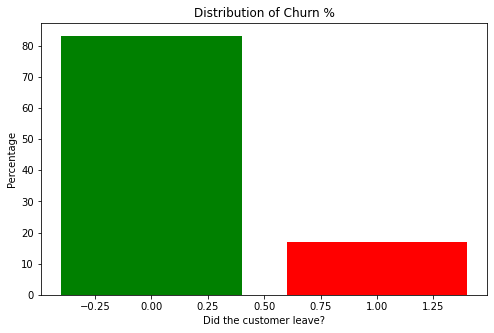

In [9]:
fig, axes = plt.subplots(figsize=(8,5))
data = df["Churn"].value_counts(normalize=True)
axes.bar(data.index, data*100, color=['green', 'red'])
axes.set_title('Distribution of Churn %')
axes.set_ylabel('Percentage')
axes.set_xlabel('Did the customer leave?')
plt.show()

Observations:

Dari data set, customer yang churn mendekati 20%, sedangkan yang tidak churn sekitar 80%.

### For Categorical Values

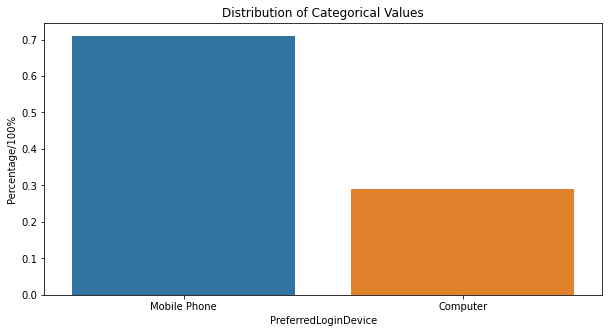

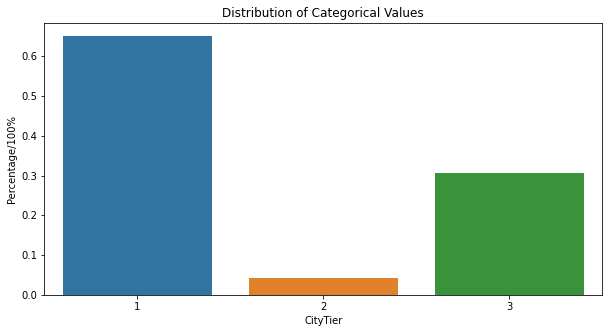

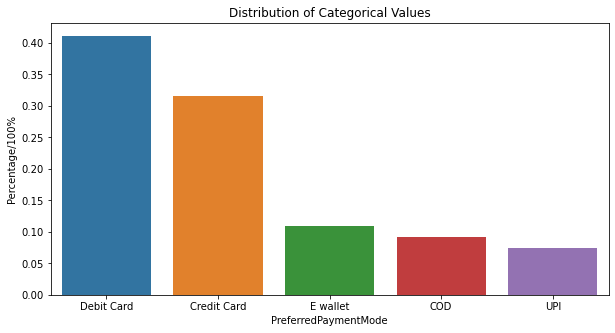

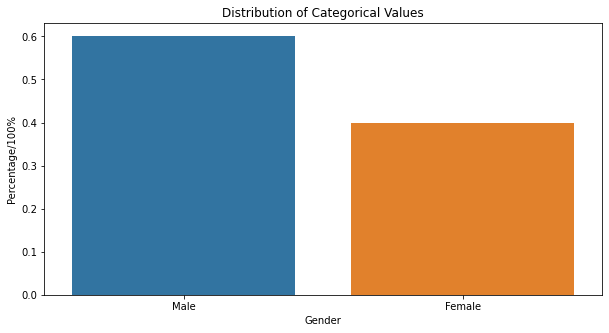

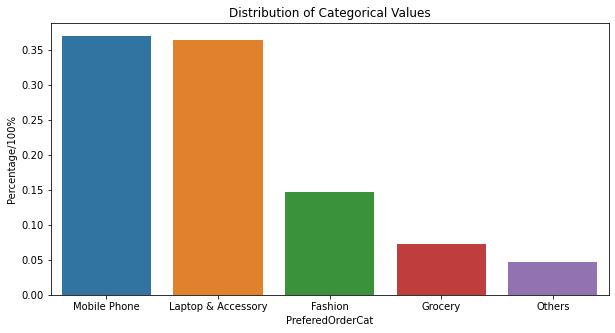

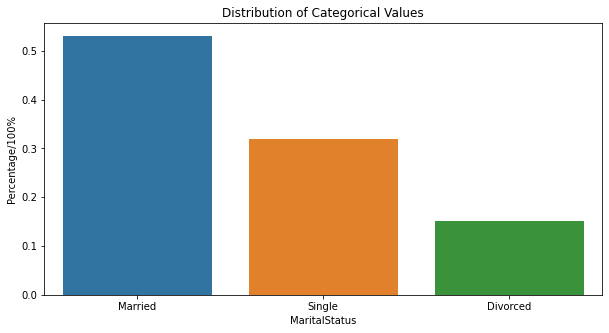

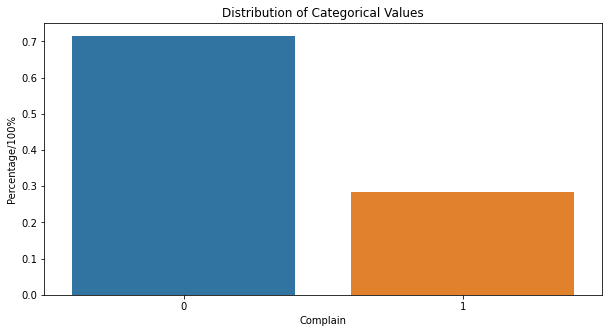

In [10]:
for col in df.columns:
    if df[col].dtypes == 'object':
        value_counts = df[col].value_counts(normalize=True)
        fig, axes = plt.subplots(figsize=(10,5))
        sns.barplot(x = value_counts.index, y = value_counts)
        axes.set_title('Distribution of Categorical Values')
        axes.set_ylabel('Percentage/100%')
        axes.set_xlabel(col)
        plt.show()

Observations:
- Preferred Login Device: Sekitar 70% pengguna menggunakan Mobile Phone untuk menggunakan layanan ecommerce "ijo", sedangkan yang menggunakan Computer hanya berkisar 20% mendekati 30%. Dengan demikian, pengguna ecommerce "ijo" lebih banyak menggunakan Mobile Phone di bandingkan dengan Computer.
- City Tier: Pengguna ecommerce "ijo" paling banyak berasal dari CityTier 1 yaitu sekitar 65%, dan CityTier 3 sekitar 30%. Sedangkan pengguna di CityTier 2 hanya berkisar 5%.
- Preferred Payment Mode: Pilihan pembayaran yang paling banyak digunakan adalah Debit Card yaitu ~40%, sedangkan Credit Card ~30%, dan E Wallet hanya ~10%. Pilihan pembayaran yang paling sedikit digunakan adalah COD dan UPI. Penggunaan nya masih di bawah 10%.
- Gender: ~60% pengguna ecommerce "ijo" paling adalah Laki-laki, memiliki ~20% pengguna lebih banyak dari Perempuan yaitu ~40%
- Preferred Order Category: Category yang paling banyak diminati adalah Mobile Phone ~37%, dan juga Laptop & Accessory, yang memiliki presentesae yang hampir sama yaitu sekitar ~36%. Sedangkan kategori Fashion & Grocery masing-masing ~15% & ~7%. Kategori Lainnya memiliki peminat paling sedikit yaitu ~4%
- Marital Status: Lebih dari 50% pengguna ecommerce "ijo" sudah menikah. 

                        

### For Continuous Variables

Tenure


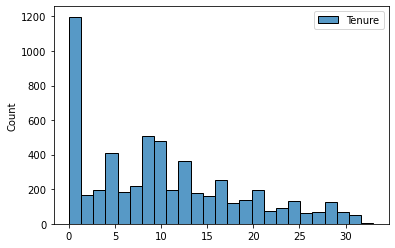

<Figure size 720x360 with 0 Axes>

WarehouseToHome


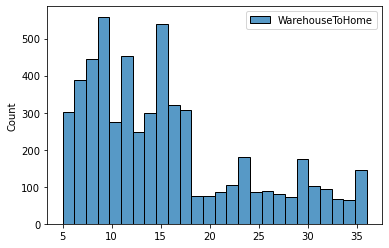

<Figure size 720x360 with 0 Axes>

HourSpendOnApp


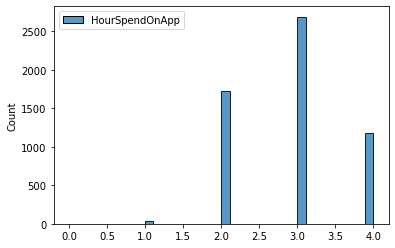

<Figure size 720x360 with 0 Axes>

NumberOfDeviceRegistered


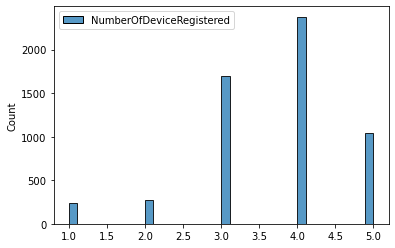

<Figure size 720x360 with 0 Axes>

SatisfactionScore


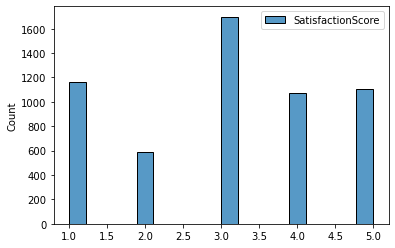

<Figure size 720x360 with 0 Axes>

NumberOfAddress


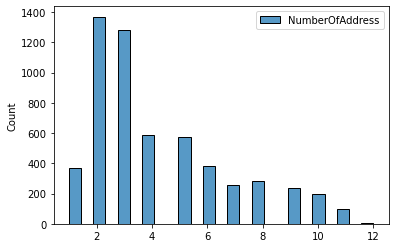

<Figure size 720x360 with 0 Axes>

OrderAmountHikeFromlastYear


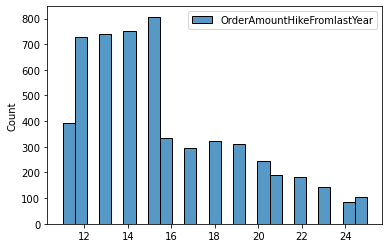

<Figure size 720x360 with 0 Axes>

CouponUsed


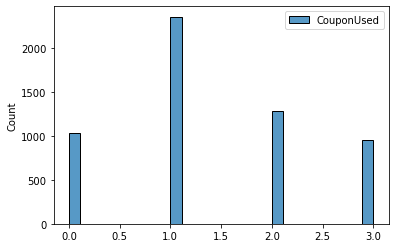

<Figure size 720x360 with 0 Axes>

OrderCount


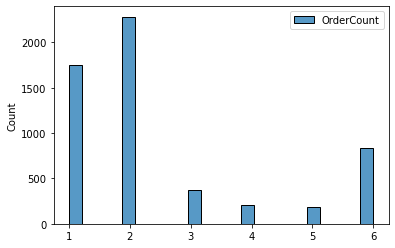

<Figure size 720x360 with 0 Axes>

DaySinceLastOrder


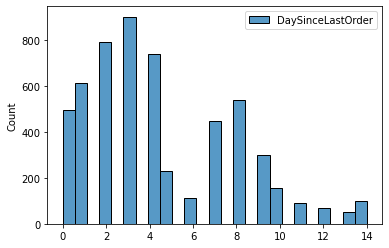

<Figure size 720x360 with 0 Axes>

CashbackAmount


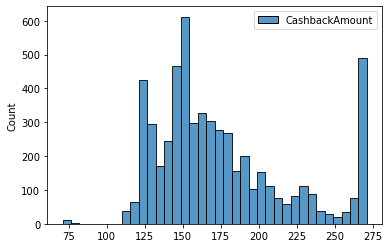

<Figure size 720x360 with 0 Axes>

In [11]:
for col in df.columns:
    if df[col].dtypes != 'object' and col != "Churn":
        print(col)
        sns.histplot(data=df[[col]])
        plt.figure(figsize=(10, 5))        
        plt.show()

rata rata dari fitur numerik persebarannya skew dan data tidak terdistribusi normal

# Data Correlation

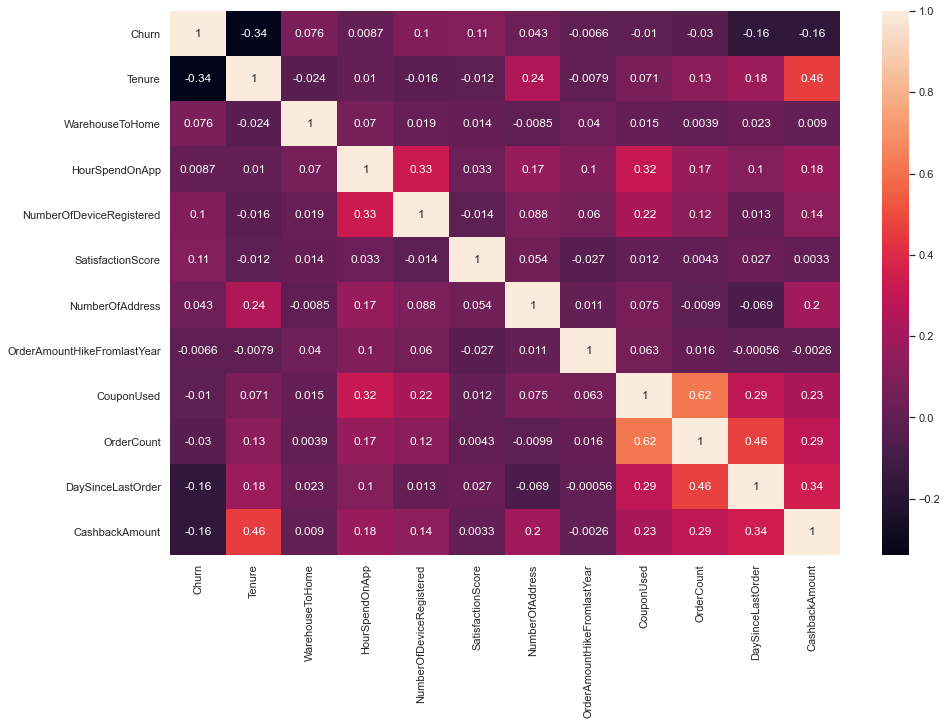

In [12]:
# let's check correlation
sns.set(rc={'figure.figsize':(15,10)})
corr = df.corr()
sns.heatmap(corr,annot=True)
plt.show()

CouponUsed dan OrderCount berkorelasi kuat, make sense karena setiap pengguna dengan lebih banyak kupon dapat memesan lebih banyak barang.<br>
Namun, itu hanya 0,62 jadi sementara bisa kita keep datanya.

# Data Cardinality
ukuran keunikan data pada kolom tertentu

### Cek Target

In [13]:
df["Churn"].unique()

array([1, 0], dtype=int64)

In [14]:
df["Churn"].value_counts() / len(df)

0    0.831616
1    0.168384
Name: Churn, dtype: float64

bisa kita lihat disini data kita cukup imbalance

In [15]:
df.groupby("Churn").mean()

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
Churn,,,,,,,,,,,
0,11.424391,15.302648,2.885946,3.616617,3.001282,4.158906,15.679411,1.388936,2.543571,4.728535,178.387014
1,3.945148,16.945148,2.902954,3.875527,3.390295,4.450422,15.616034,1.362869,2.407173,3.241561,159.611814


### the unique values of each column

In [16]:
#This function will search and print for all the unique values in each column.
def print_unique_col_values(dataframe):
       for column in dataframe:
            if dataframe[column].dtypes=='object':
                print(f'{column}: {dataframe[column].unique()}')

In [17]:
print_unique_col_values(df)

PreferredLoginDevice: ['Mobile Phone' 'Computer']
CityTier: [3 1 2]
PreferredPaymentMode: ['Debit Card' 'UPI' 'Credit Card' 'COD' 'E wallet']
Gender: ['Female' 'Male']
PreferedOrderCat: ['Laptop & Accessory' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
MaritalStatus: ['Single' 'Divorced' 'Married']
Complain: [1 0]


# Check the demographic variables

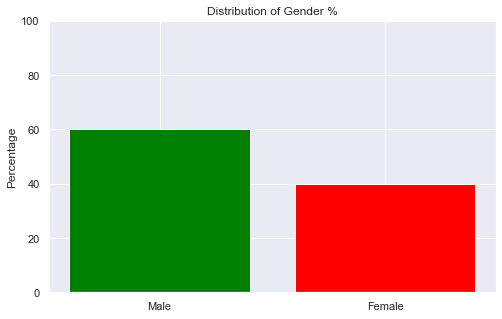

In [18]:
fig, axes1 = plt.subplots(figsize=(8,5))

# Plot distribution of gender data
data = df["Gender"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=['green', 'red'])
axes1.set_title('Distribution of Gender %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,100)
plt.show()

Observation
- Gender: ~60% pengguna ecommerce hijau paling banyak adalah Laki-laki, yang memiliki ~20% pengguna lebih banyak dari Perempuan yaitu ~40%.

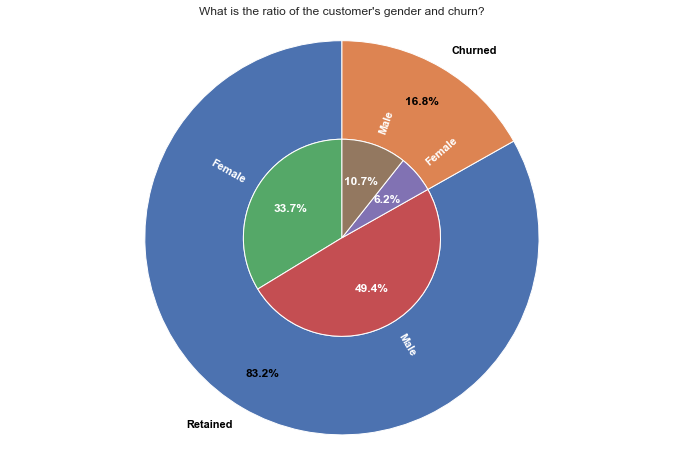

In [19]:
fig, axes2 = plt.subplots(figsize=(12,8))

# Pie chart of churn percentage
width = 0.5

# Percentage of Churned vs Retained
data = df.Churn.value_counts().sort_index()
axes2.pie(
    data,
    labels=['Retained', 'Churned'],
    autopct='%1.1f%%',
    pctdistance=0.8,
    startangle=90,
    textprops={'color':'black', 'fontweight':'bold'},
    wedgeprops = {'width':width, 'edgecolor':'w'},
    radius=1,
)

# Percentage of Gender based on Churn
data = df.groupby(["Churn", "Gender"]).size().reset_index()
axes2.pie(
    data.iloc[:,2], 
    labels=list(data.Gender),
    autopct='%1.1f%%',
    startangle=90,
    textprops={'color':'white', 'fontweight':'bold'},
    wedgeprops = {'width':width, 'edgecolor':'w'},
    radius=1-width,
    rotatelabels=True,
)

axes2.set_title('What is the ratio of the customer\'s gender and churn?')
#axes2.legend(loc='best', bbox_to_anchor=(1,1))
axes2.axis('equal')

plt.show()

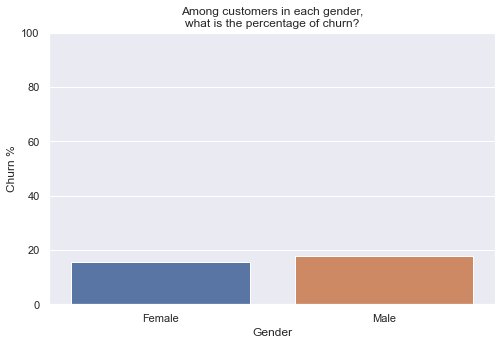

In [20]:
fig, axes3 = plt.subplots(figsize=(8,5))

# Chances of churn based on gender
sns.barplot(x="Gender", y=df.Churn*100, data=df, ci=None, ax=axes3)
axes3.set_xlabel('Gender')
axes3.set_ylabel('Churn %')
axes3.set_title('\n'.join(wrap('Among customers in each gender, what is the percentage of churn?', 35)))
axes3.set_ylim(0,100)
plt.show()

Observations
- Dari dataset, distribusi Laki-laki lebih banyak dari Perempuan
- Dari 16,8% customer yang churn, 10.7%% nya adalah Laki-Laki dan 6.2% nya adalah Perempuan
- Namun, dari 83.2% customer yang bertahan, yang paling banyak adalah Laki-Laki yaitu sebesar 49.4%
dari keseluruhan pengguna, sedangkan Perempuan 33.7%
- Presentase Churn diantara pengguna dalam setiap Gender juga memperlihatkan presentase Churn Laki-Laki ~19% .
Sedangkan diantara perempuan presentase Churn nya ~17%. Dua-duanya berada di hampir level presentase yang sama.

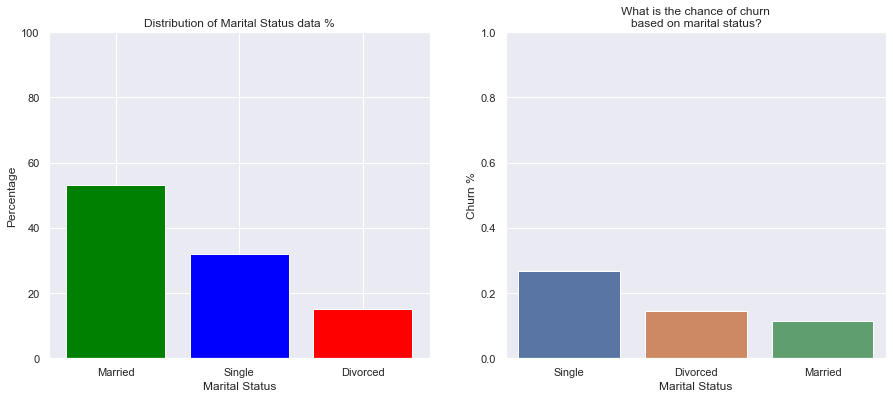

In [21]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of marital status
data = df["MaritalStatus"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=['green','blue', 'red'])
axes1.set_title('Distribution of Marital Status data %')
axes1.set_xlabel('Marital Status')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,100)

# Chances of churn based on Marital Status
sns.barplot(x="MaritalStatus", y="Churn", data=df, ci=None, ax=axes2)
axes2.set_xlabel('Marital Status')
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('What is the chance of churn based on marital status?', 30)))
axes2.set_ylim(0,1)

plt.show()

Observations
- Pengguna ecommerce "ijo" paling banyak adalah orang yang sudah menikah yaitu ~50%
- Pengguna yang Single memiliki presentase Churn paling banyak yaitu ~30%.


# Check the product variables

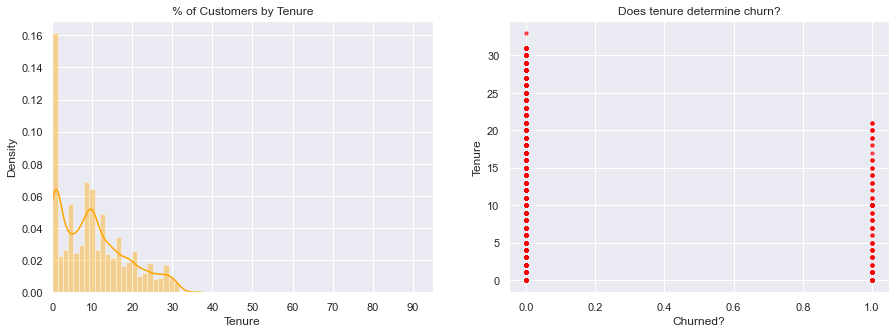

In [22]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,5))

# Plot tenure
sns.distplot(df.Tenure, color='orange', ax=axes1)
axes1.set_title('% of Customers by Tenure')
axes1.set_xticks(np.arange(0, 100, 10))
axes1.set_xlim(0,95)

# Plot relation between tenure and churn
axes2.scatter(df.Churn, df.Tenure, color='red', s=10, alpha=0.2)
axes2.set_xlabel('Churned?')
axes2.set_ylabel('Tenure')
axes2.set_title('Does tenure determine churn?')

plt.show()

Observations
- Mayoritas pengguna memiliki umur Tenure yang pendek. Jadi, Pengguna kemungkinan churn dalam waktu kurang dari 1 tahun atau hanya pengguna baru.
- Ada peningkatan (Spike) jumlah customer dalam  Tenur 10 bulan.
- Dalam diagram sebelah kanan, memperlihatkan bahwa semakin lama Tenur, maka kemungkinan untuk Churn berkurang

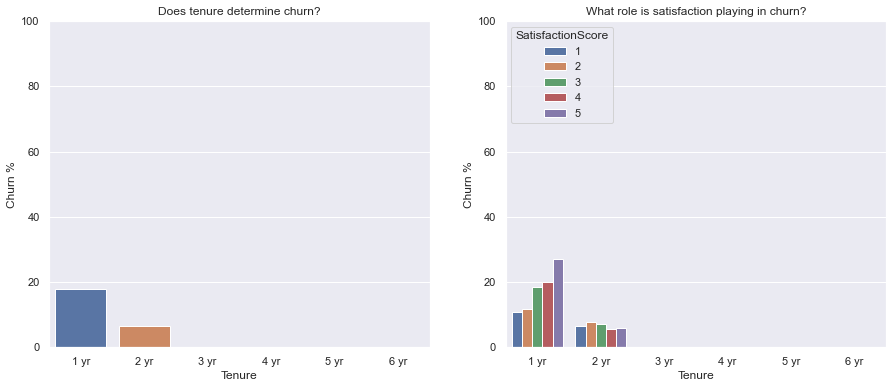

In [23]:
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['1 yr', '2 yr', '3 yr', '4 yr', '5 yr', '6 yr']
df['tenureGroup'] = pd.cut(df["Tenure"], bins, labels=labels)

# Bar plot tenure vs churn
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))
sns.barplot(x="tenureGroup", y=df.Churn*100, data=df, ci=None, ax=axes1)
axes1.set_xlabel('Tenure')
axes1.set_ylabel('Churn %')
axes1.set_ylim(0,100)
axes1.set_title('Does tenure determine churn?')

# Bar plot tenure vs churn vs satisfaction score
sns.barplot(x="tenureGroup", y=df.Churn*100, hue="SatisfactionScore", data=df, ci=None, ax=axes2)
axes2.set_xlabel('Tenure')
axes2.set_ylabel('Churn %')
axes2.set_ylim(0,100)
axes2.set_title('What role is satisfaction playing in churn?')


plt.show()

Observations
- Pengguna baru memiliki kecenderungan untuk Churn lebih besar. Pengguna dengan Tenure 1 tahun memiliki kecenderungan
Churn hampir 20% di banding pengguna di tahun ke 2 yang kurang dari 10%.
- Tidak ada customer yang memiliki kecenderungan Churn pada Tenure lebih dari 2 tahun. Semakin lama tenure, churn berkurang
- Yang menarik, tingkat kepuasan 5 adalah yang paling banyak Churn pada tahun pertama.

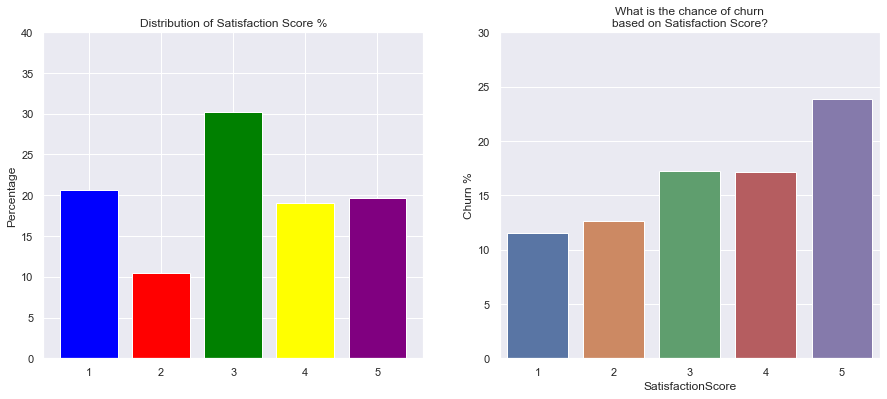

In [24]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of Satisfaction Score
data = df["SatisfactionScore"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=['green','blue','purple','yellow','red'])
axes1.set_title('Distribution of Satisfaction Score %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,40)

# Chances of churn based on Satisfaction Score
sns.barplot(x="SatisfactionScore", y=df.Churn*100, data=df, ci=None, ax=axes2)
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('What is the chance of churn based on Satisfaction Score?', 30)))
axes2.set_ylim(0,30)

plt.show()

Observation
- Distribusi kepuasan pengguna 3 memiliki data paling banyak di sekitar 30%
- Tingkat kepuasan 5 memiliki kecenderungan Churn paling banyak yaitu sekitar lebih dari 20%

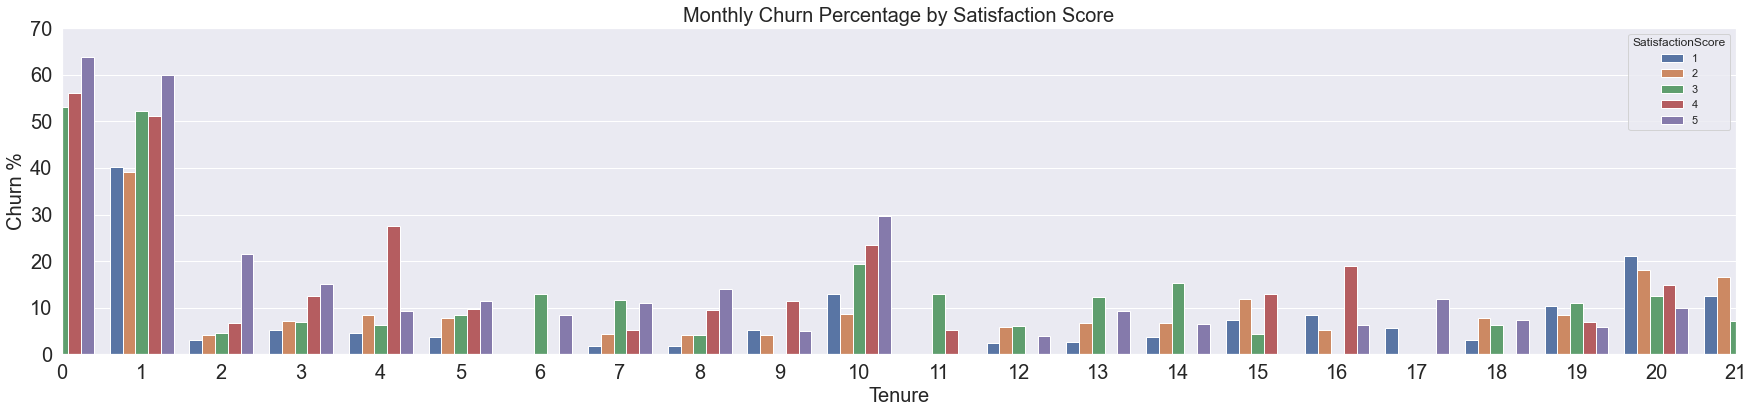

In [25]:
fig, axes2 = plt.subplots(figsize=(30,6))
sns.barplot(x="Tenure", y=df.Churn*100, hue="SatisfactionScore", data=df, ci=None, ax=axes2)
axes2.set_xlabel('Tenure', fontsize = 20)
axes2.set_ylabel('Churn %', fontsize = 20)
axes2.set_ylim(0,70)
axes2.set_xlim(0,21)
axes2.set_title("Monthly Churn Percentage by Satisfaction Score", fontsize = 20)
axes2.xaxis.set_tick_params(labelsize=20)
axes2.yaxis.set_tick_params(labelsize=20)

plt.show()

#satisScore_5 = df[df['SatisfactionScore']==5].value_counts()
#df.groupby(df['SatisfactionScore']==5)['Tenure'].value_counts()
#fig, axes2 = plt.subplots(figsize=(30,6))
#sns.barplot(x='Tenure', y='satisScore_5', data=df, ci=None, ax=axes2)
#axes2.set_ylabel('Satisfaction Score', fontsize = 20)
#axes2.set_xlabel('Tenure', fontsize = 20)
#axes2.set_title("What is the chance of churn based on Warehouse To Home?", fontsize = 20)
#axes2.set_ylim(0,5)
#axes2.xaxis.set_tick_params(labelsize=20)
#axes2.yaxis.set_tick_params(labelsize=20)

#plt.show()

Observation
- Lebih dari 50% pengguna yang memberikan nilai kepuasan 3,4,&5 Churn pada Bulan ke 0
- Nilai Churn masih berkisar ~40% - ~60% untuk pengguna yang memberikan nilai kepuasan
- ~65% Pengguna yang memberikan nilai Satisfaction Score 5, Churned pada Bulan ke 0, dan ~60% pada Bulan ke 1
- Pengguna yang memberikan nilai Satisfaction Score 5 memiliki tingkat Churn tertinggi dari Bulan 0 - 3
- Pada bulan ke 10 merupakan tingkat Churn tertinggi terakhir untuk pengguna yang memberikan Satisfaction Score 5
- Namun pada bulan ke 17 hanya pengguna yang memberikan nilai Satisfaction Score 5 yang Churn

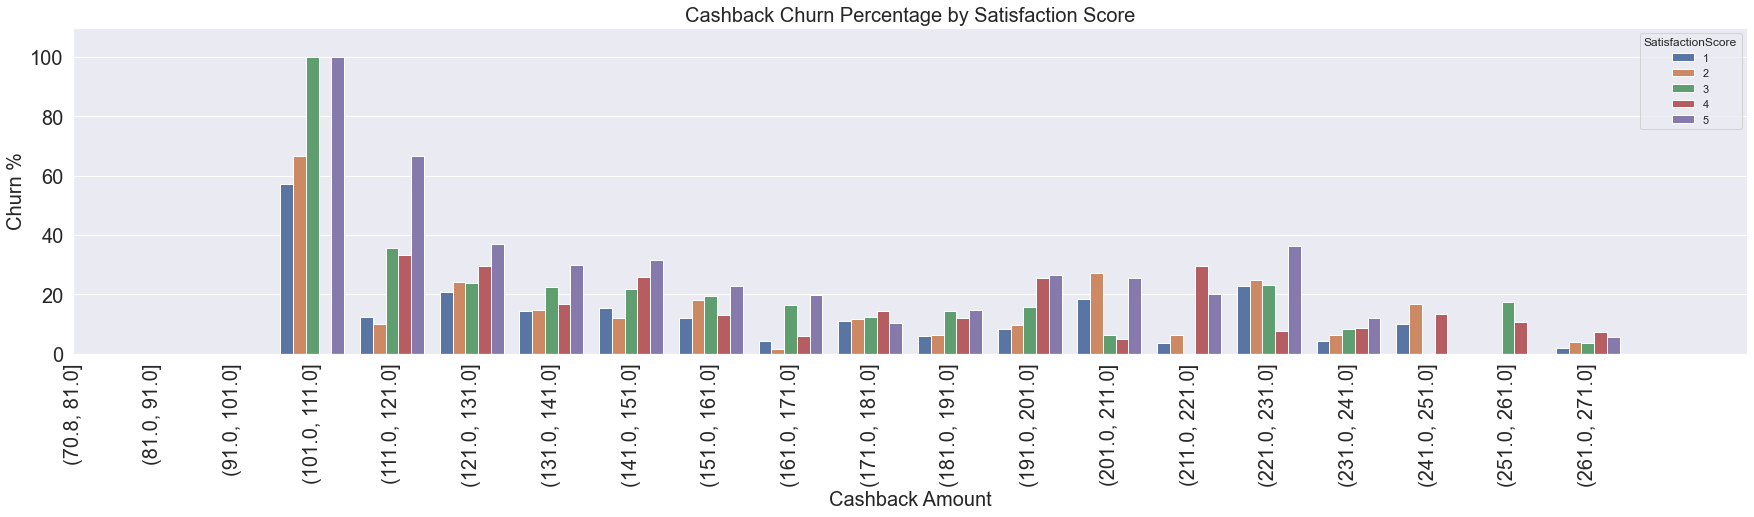

In [26]:
fig, axes2 = plt.subplots(figsize=(30,6))
df['CashbackAmountCategory'] = pd.cut(df["CashbackAmount"], bins=20)
sns.barplot(x="CashbackAmountCategory", y=df.Churn*100, hue="SatisfactionScore", data=df, ci=None, ax=axes2)
[items.set_rotation(90) for items in axes2.get_xticklabels()]
axes2.set_xlabel('Cashback Amount', fontsize = 20)
axes2.set_ylabel('Churn %', fontsize = 20)
axes2.set_ylim(0,110)
axes2.set_xlim(0,21)
axes2.set_title("Cashback Churn Percentage by Satisfaction Score", fontsize = 20)
axes2.xaxis.set_tick_params(labelsize=20)
axes2.yaxis.set_tick_params(labelsize=20)

plt.show()

Observation
- Meskipun memberikan Satisfaction Score 5, pelanggan dengan Cashback terendah USD 110 - 111  memiliki tingkat Churn 100%
- Pelanggan yang memberikan Satisfaction Score 3, juga memiliki tingkat Churn 100% ketika mendapatkan Cashback Amount USD 110- USD 111 
- Pelanggan yang memberikan Satisfaction Score 5, masih memiliki tingkat Churn tertinggi hingga Cashback Amount USD 161 - 171

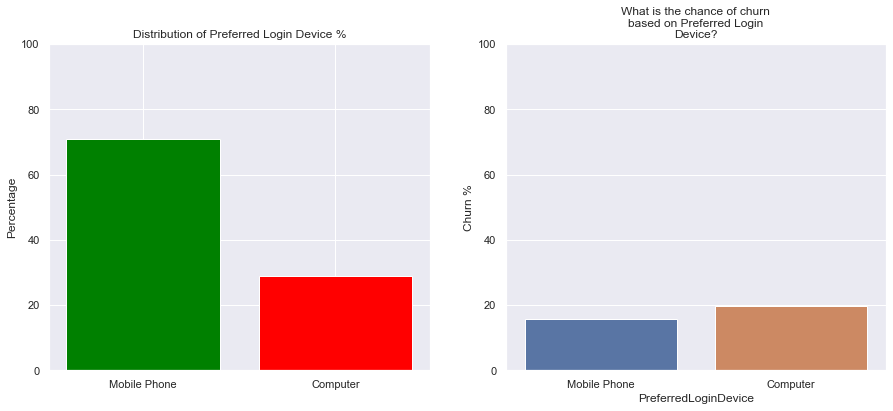

In [27]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of Preferred Login Device
data = df["PreferredLoginDevice"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=['green','red'])
axes1.set_title('Distribution of Preferred Login Device %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,100)

# Chances of churn based on Preferred Login Device
sns.barplot(x="PreferredLoginDevice", y=df.Churn*100, data=df, ci=None, ax=axes2)
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('What is the chance of churn based on Preferred Login Device?', 30)))
axes2.set_ylim(0,100)

plt.show()

Observation
- ~70% pengguna mengakses ecommerce menggunakan Mobile Phone, lebih banyak ~40% di banding dengan pengguna Computer
yang hanya ~30%
- Pengguna yang mengakses Computer memiliki persentase Churn lebih tinggi di banding Mobile Phone (~20%)

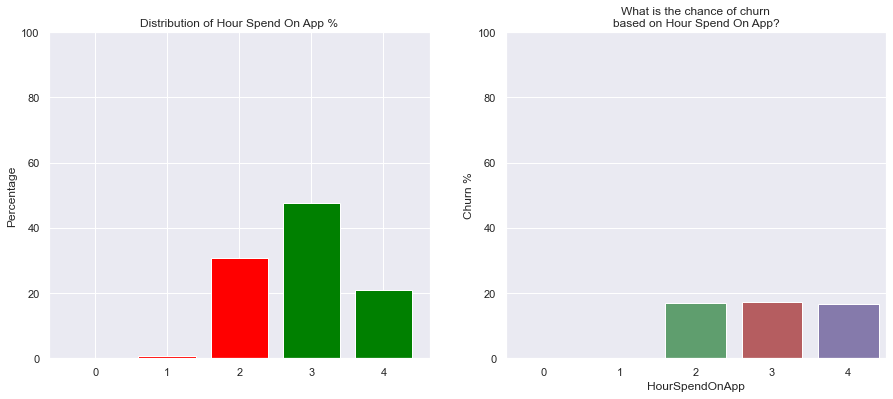

In [28]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of Hour Spend On App
data = df["HourSpendOnApp"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=['green','red'])
axes1.set_title('Distribution of Hour Spend On App %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,100)

# Chances of churn based on Hour Spend On App
sns.barplot(x="HourSpendOnApp", y=df.Churn*100, data=df, ci=None, ax=axes2)
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('What is the chance of churn based on Hour Spend On App?', 30)))
axes2.set_ylim(0,100)

plt.show()

Observation
- Sebanyak 50% pengguna menggunakan ecommerce selama 3 jam.
- Presentase Churn pengguna yang menggunakan aplikasi selama lebih dari 1 jam memiliki distribusi yang hampir sama ~18%
- Pengguna yang menggunakan aplikasi kurang dari 2 jam cenderung memiliki presentase Churn yang lebih rendah

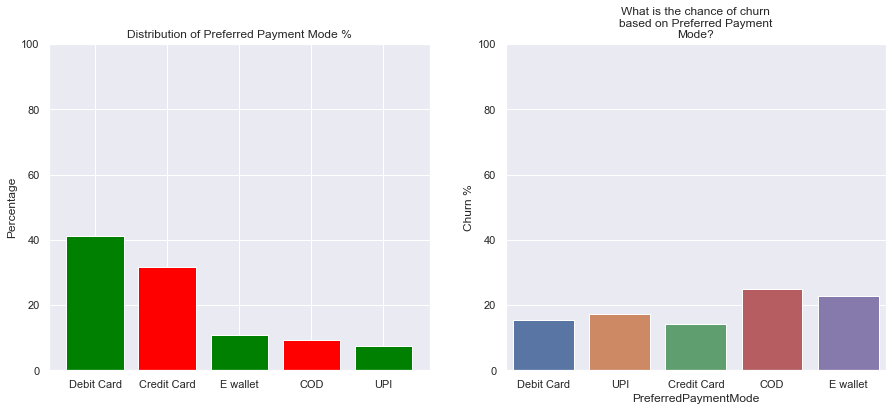

In [29]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of Preferred Payment Mode
data = df["PreferredPaymentMode"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=['green','red'])
axes1.set_title('Distribution of Preferred Payment Mode %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,100)

# Chances of churn based on Preferred Payment Mode
sns.barplot(x="PreferredPaymentMode", y=df.Churn*100, data=df, ci=None, ax=axes2)
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('What is the chance of churn based on Preferred Payment Mode?', 30)))
axes2.set_ylim(0,100)

plt.show()

Observation
- Pilihan pembayaran yang paling banyak digunakan adalah Debit Card yaitu ~40%, 
sedangkan Credit Card ~30%, dan E Wallet hanya ~10%. Pilihan pembayaran yang paling sedikit digunakan 
adalah COD dan UPI. Penggunaan nya masih di bawah 10%.
- presentase Churn yang paling tinggi adalah COD sekitar 25%
- Pengguna Credit Card memiliki presentase Churn paling rendah ~16%

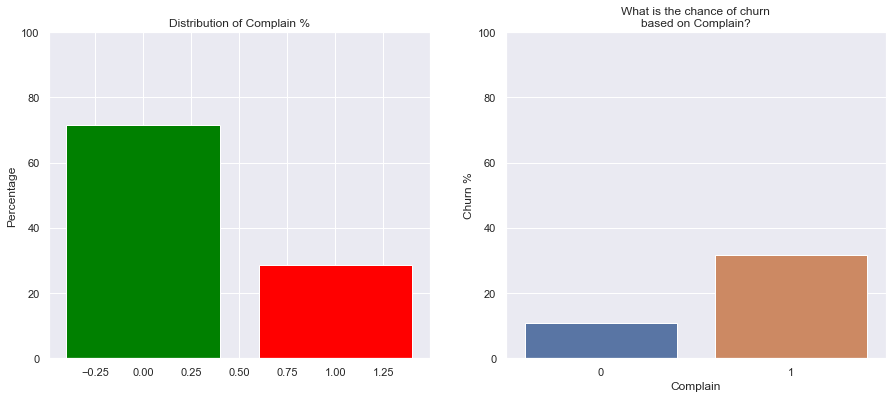

In [30]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of Complain
data = df["Complain"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=['green','red'])
axes1.set_title('Distribution of Complain %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,100)

# Chances of churn based on Complain
sns.barplot(x="Complain", y=df.Churn*100, data=df, ci=None, ax=axes2)
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('What is the chance of churn based on Complain?', 30)))
axes2.set_ylim(0,100)

plt.show()

Observation
- Pengguna yang melakukan complain terhadap ecommerce memiliki distribusi data lebih rendah
dari yang tidak pernah memiliki complain, yaitu hanya sekitar 30%
- Namun pelanggan yang tidak memiliki complain, masih memiliki presentase Churn sebesar ~10%

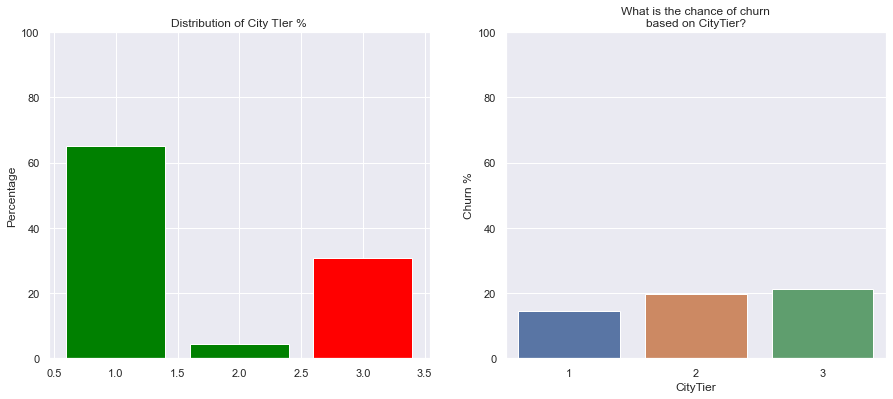

In [31]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of City Tier
data = df["CityTier"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=['green','red'])
axes1.set_title('Distribution of City TIer %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,100)

# Chances of churn based on City Tier
sns.barplot(x="CityTier", y=df.Churn*100, data=df, ci=None, ax=axes2)
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('What is the chance of churn based on CityTier?', 30)))
axes2.set_ylim(0,100)

plt.show()

Observation
- Pengguna aplikasi paling banyak berasal dari City Tier 1 sekitar 63%, sedangkan City Tier 2 paling sedikit ~5%
- Semakin tinggi City Tier, semakin tinggi pula presentase Churn.
- City Tier 2 & 3 memiliki presentase Churn yang hampir sama yaitu sekitar ~20%.

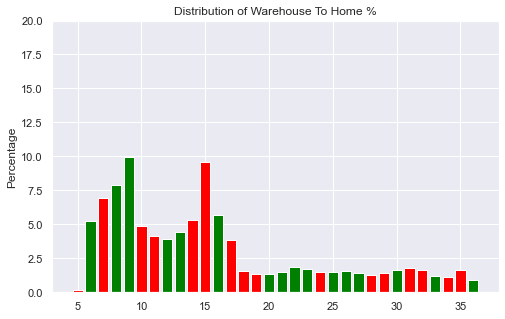

In [32]:
fig, axes1 = plt.subplots(figsize=(8,5))
# Plot distribution of Warehouse To Home
data = df["WarehouseToHome"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=['green','red'])
axes1.set_title('Distribution of Warehouse To Home %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,20)

plt.show()

Observation
- Semakin jauh jarak, semakin sedikit jumlah pengguna aplikasi
- Pengguna paling banyak terdapat pada jarak 9km, yaitu sekitar 10%
- Namun ada peningkatan pengguna pada jarak 15km

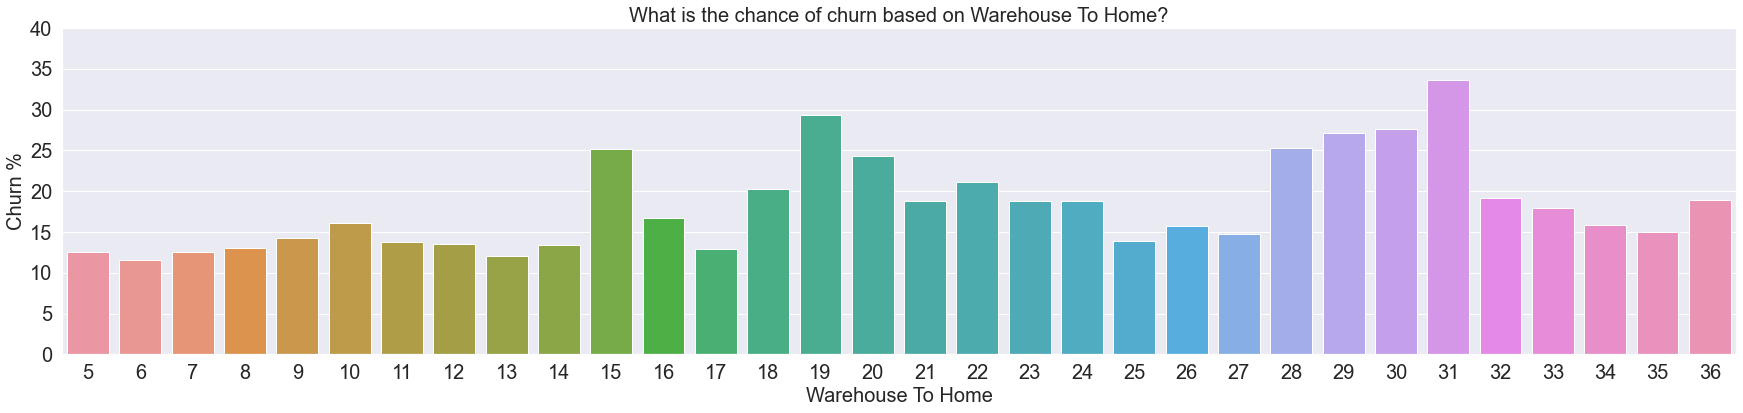

In [33]:
# Chances of churn based on WarehouseToHome
fig, axes2 = plt.subplots(figsize=(30,6))
sns.barplot(x='WarehouseToHome', y=df.Churn*100, data=df, ci=None, ax=axes2)
axes2.set_ylabel('Churn %', fontsize = 20)
axes2.set_xlabel('Warehouse To Home', fontsize = 20)
axes2.set_title("What is the chance of churn based on Warehouse To Home?", fontsize = 20)
axes2.set_ylim(0,40)
axes2.xaxis.set_tick_params(labelsize=20)
axes2.yaxis.set_tick_params(labelsize=20)

plt.show()

Observation
- Tingkat presentase Churn pada jarak Warehouse ke rumah ada di sekitar 15% - 20%
- Terjadi kenaikan signifikan pada jarak 15km, 19km, dan juga 31km
- Semakin jauh jarak rumah ke gudang, potensi churn semakin meningkat

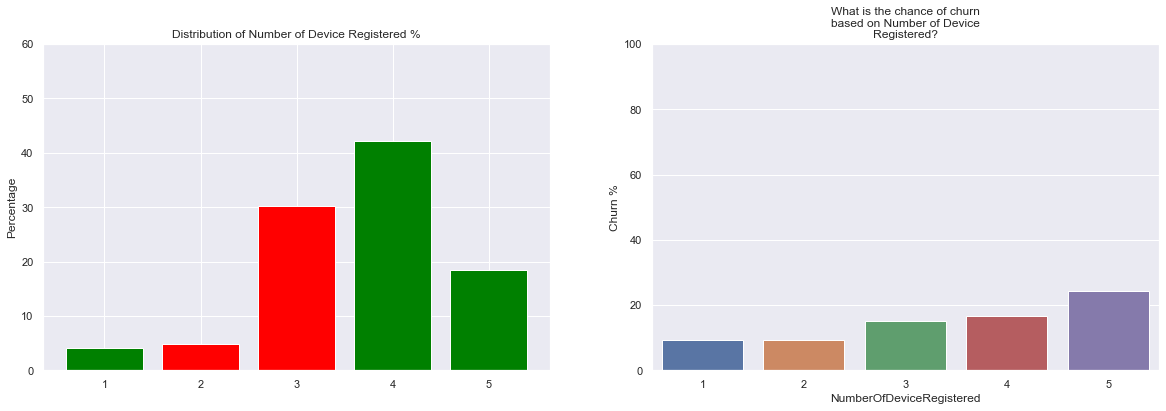

In [34]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(20,6))

# Plot distribution of Number of Device Registered
data = df["NumberOfDeviceRegistered"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=['green','red'])
axes1.set_title('Distribution of Number of Device Registered %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,60)

# Chances of churn based on Number of Device Registered
sns.barplot(x="NumberOfDeviceRegistered", y=df.Churn*100, data=df, ci=None, ax=axes2)
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('What is the chance of churn based on Number of Device Registered?', 30)))
axes2.set_ylim(0,100)

plt.show()

Observation
- Pengguna aplikasi yang memiliki 1-2 device saja hanya ada ~5%
- Lebih dari ~40% pengguna aplikasi memiliki 4 device.
- Semakin banyak jumlah device pengguna, semakin tinggi tingkat presentase Churn.

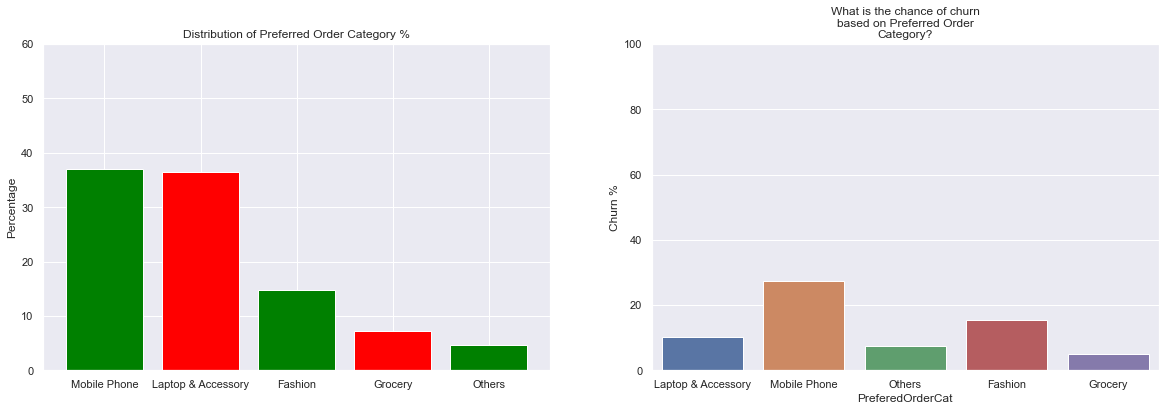

In [35]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(20,6))

# Plot distribution of Preferred Order Cat
data = df["PreferedOrderCat"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=['green','red'])
axes1.set_title('Distribution of Preferred Order Category %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,60)

# Chances of churn based on Number of Device Registered
sns.barplot(x="PreferedOrderCat", y=df.Churn*100, data=df, ci=None, ax=axes2)
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('What is the chance of churn based on Preferred Order Category?', 30)))
axes2.set_ylim(0,100)

plt.show()

Observation
- Pengguna memiliki minat yang tinggi terhadap Mobile Phone dan Laptop & Accessory, masing-masing sekitar 35%
- Kategori Lainnya hanya diminati sekitar 5% pengguna
- Namun, pengguna yang membeli pada kategori mobile phone memiliki presentase Churn 30% lebih tinggi dibandingkan pengguna yang membeli pada kategori Laptop & Accessory

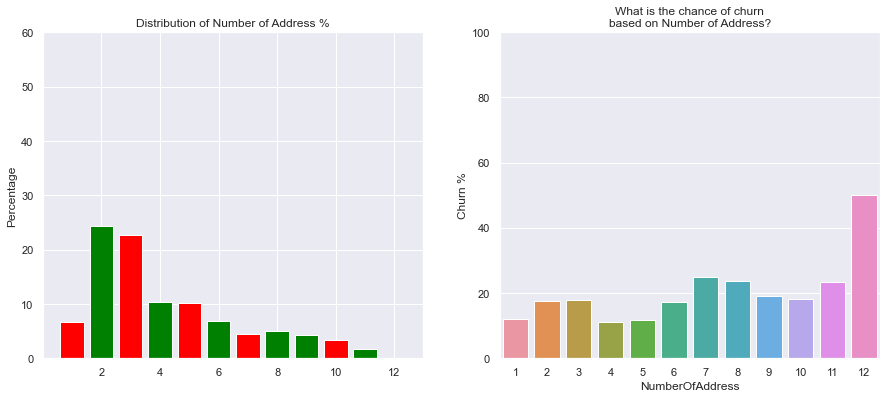

In [36]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of Number of Address
data = df["NumberOfAddress"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=['green','red'])
axes1.set_title('Distribution of Number of Address %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,60)

# Chances of churn based on Number of Device Registered
sns.barplot(x="NumberOfAddress", y=df.Churn*100, data=df, ci=None, ax=axes2)
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('What is the chance of churn based on Number of Address?', 30)))
axes2.set_ylim(0,100)

plt.show()

Observation
- Pengguna yang memiliki 2 & 3 alamat memiliki distribusi data paling banyak di sekitar 25%
- Semakin banyak jumlah alamat yang terdaftar, maka tingkat Churn semakin tinggi. Customer dengan jumlah 12 alamat
memiliki tingkat Churn sebesar 50%

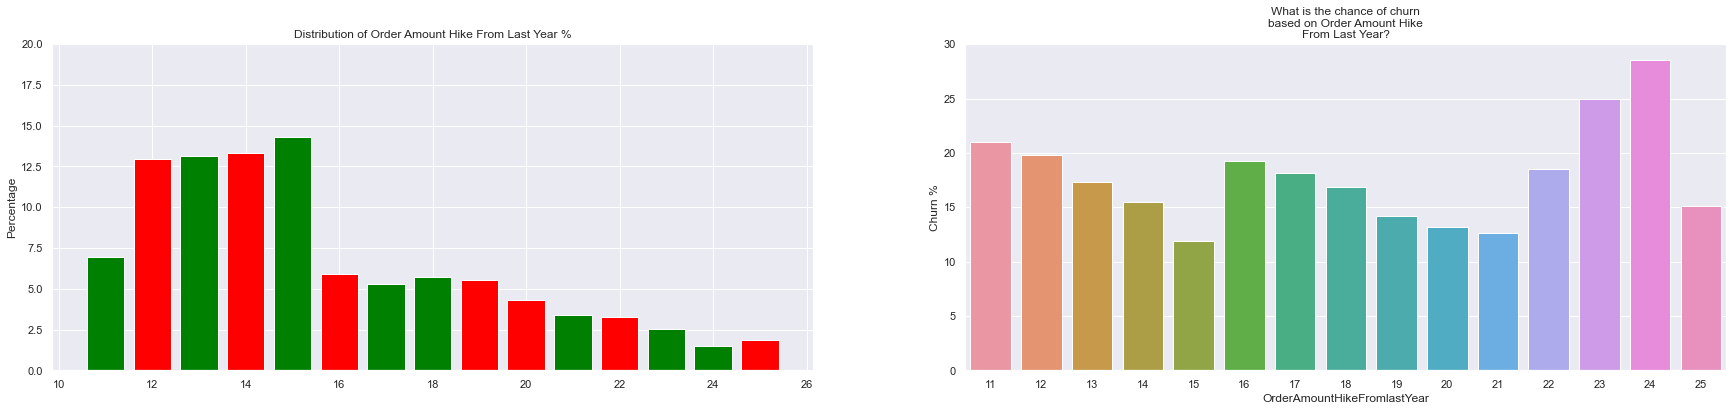

In [37]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(30,6))

# Plot distribution of Order Amount Hike From Last Year
data = df["OrderAmountHikeFromlastYear"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=['green','red'])
axes1.set_title('Distribution of Order Amount Hike From Last Year %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,20)

# Chances of churn based on Order Amount Hike From Last Year
sns.barplot(x="OrderAmountHikeFromlastYear", y=df.Churn*100, data=df, ci=None, ax=axes2)
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('What is the chance of churn based on Order Amount Hike From Last Year?', 30)))
axes2.set_ylim(0,30)

plt.show()

Observation
- Peningkatan pesanan paling banyak terjadi di kisaran jumlah 12 - 15 pesanan, yaitu ~13% pengguna
- Semakin banyak peningkatan jumlah pesanan di banding tahun lalu, semakin sedikit jumlah pengguna
- Sedangkan tingkat presentase Churn memiliki siklus Penurunan tiap 5 pesanan. 11-15 Pesanan dan 16-21 pesanan.
- Peningkatan Signifikan presentase Churn terjadi pada peningkatan jumlah pesanan 22-24
- Tetapi, pada jumlah pesanan 25 terjadi penurunan kembali.

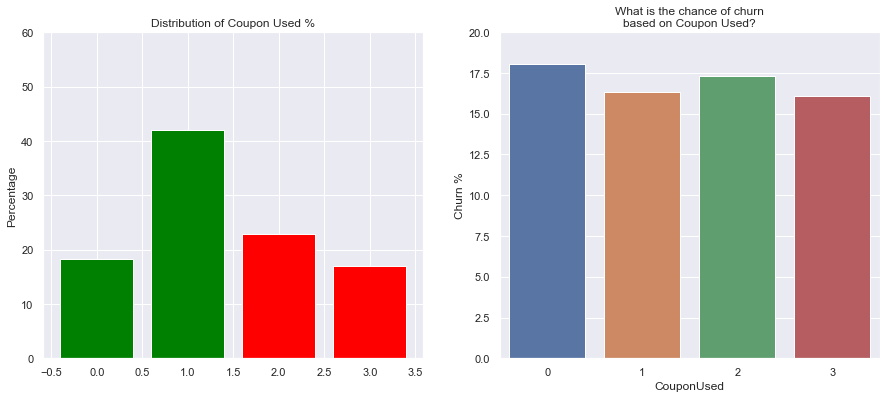

In [38]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of Coupon Used
data = df["CouponUsed"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=['green','red'])
axes1.set_title('Distribution of Coupon Used %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,60)

# Chances of churn based on Coupon Used
sns.barplot(x="CouponUsed", y=df.Churn*100, data=df, ci=None, ax=axes2)
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('What is the chance of churn based on Coupon Used?', 30)))
axes2.set_ylim(0,20)

plt.show()

Observation
- Sebanyak ~42% pengguna telah menggunakan kupon
- Hanya berkisar di angka 20% yang menggunakan kupon lebih dari 1x, dan ~18% pengguna yang tidak pernah menggunakan kupon
- Distribusi penggunakan kupon hampir sama untuk tingkat presentase Churn. Namun pengguna yang tidak pernah menggunakan kupon
memiliki tingkat presentase Churn paling tinggi ~17.5%

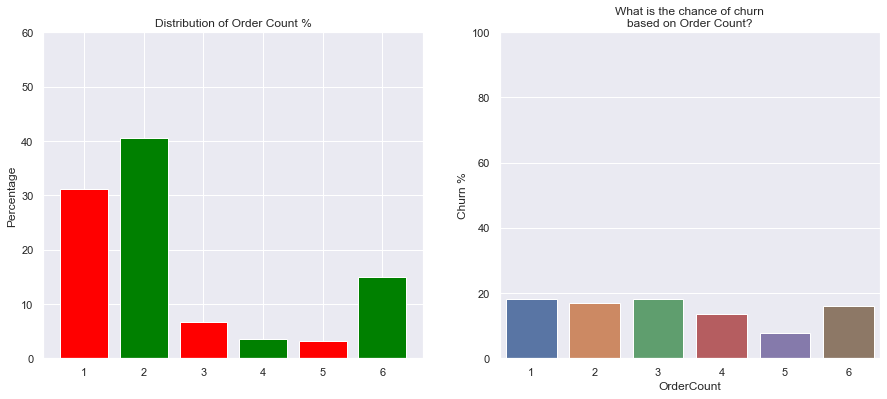

In [39]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of Order Count
data = df["OrderCount"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=['green','red'])
axes1.set_title('Distribution of Order Count %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,60)

# Chances of churn based on Order Count
sns.barplot(x="OrderCount", y=df.Churn*100, data=df, ci=None, ax=axes2)
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('What is the chance of churn based on Order Count?', 30)))
axes2.set_ylim(0,100)

plt.show()

Observation
- Jumlah pesanan 2 memiliki distribusi paling banyak sekitar 40%, dan jumlah pesanan 1 sekitar 30%.
- Terjadi peningkatan pengguna pada pemesanan sebanyak 6 kali.
- Semakin banyak jumlah pesanan semakin rendah presentase Churn. Namun peningkatan Churn terjadi kembali pada Jumlah pesanan 6

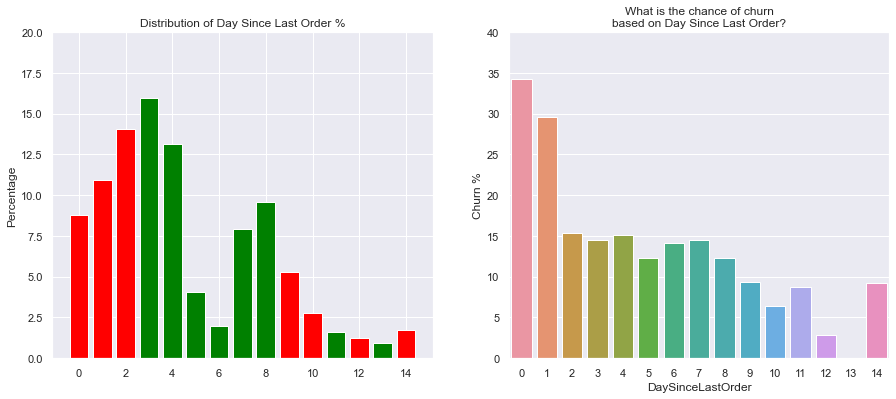

In [40]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of Day Since Last Order
data = df["DaySinceLastOrder"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=['green','red'])
axes1.set_title('Distribution of Day Since Last Order %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,20)

# Chances of churn based on Day Since Last Order
sns.barplot(x="DaySinceLastOrder", y=df.Churn*100, data=df, ci=None, ax=axes2)
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('What is the chance of churn based on Day Since Last Order?', 30)))
axes2.set_ylim(0,40)

plt.show()

Observation
- Paling banyak pengguna tidak melakukan pemesanan adalah selama 3 hari (~16%).
- Semakin lama pengguna tidak melakukan pemesanan semakin sedikit jumlah pengguna
- Semakin lama pengguna tidak melakukan pemesanan maka tingkat Churn semakin rendah

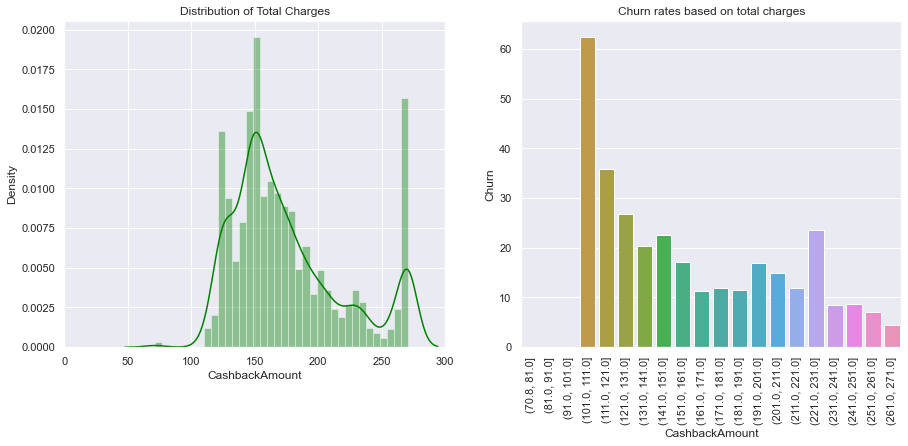

In [41]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))

# Plot Cashback Amount occurance
sns.distplot(df.CashbackAmount, color='green', ax=axes1)
axes1.set_title('Distribution of Total Charges')
axes1.set_xlim(0,300)

# Categorize Cashback Amount into bins and plot
df['CashbackAmount'] = pd.cut(df["CashbackAmount"], bins=20)
sns.barplot(x='CashbackAmount', y=df.Churn*100, data=df, ci=None, ax=axes2)
[items.set_rotation(90) for items in axes2.get_xticklabels()]
axes2.set_title('Churn rates based on total charges')

plt.show()

Observation
- Total Cashback yang didapatkan customer paling banyak adalah 150 dollar, namun ada peningkatan pengguna pada Total Cashback di sekitar 275 dollar
- Semakin tinggi cashback yang didapatkan, semakin rendah presentase Churn
- Ada peningkatan Churn signifikan pada pelanggan yang mendapatkan Cashback 221-231 dollar.

# Conclusion EDA

1. Dari hasil observasi, customer yang churn sekitar 16%, sedangkan yang tidak churn sekitar 83%<br><br>

2. Variabel CouponUsed dan OrderCount berkorelasi kuat, make sense karena setiap pengguna dengan lebih banyak kupon dapat memesan lebih banyak barang. Namun, itu hanya 0,62 jadi sementara bisa kita keep datanya.<br><br>

3. Gender: Presentase Churn diantara pengguna dalam setiap Gender juga memperlihatkan presentase Churn Laki-Laki ~19%. Sedangkan diantara perempuan presentase Churn nya ~17%. Dua-duanya berada di hampir level presentase yang sama.<br><br>

4. Marital Status: Pengguna yang Single memiliki presentase Churn paling banyak yaitu ~30%.<br><br>

5. Tenure: Semakin lama Tenur, maka kemungkinan untuk Churn berkurang. Pengguna baru memiliki kecenderungan untuk Churn lebih besar. Pengguna dengan Tenure 1 tahun memiliki kecenderungan Churn hampir 20% di banding pengguna di tahun ke 2 yang kurang dari 10%.<br><br>

6. Satisfaction Score: Tingkat kepuasan 5 adalah yang paling banyak Churn pada tahun pertama. Tingkat kepuasan 5 memiliki kecenderungan Churn paling banyak yaitu sekitar lebih dari 20%. Ternyata ~65% Pengguna yang memberikan nilai Satisfaction Score 5, Churned pada Bulan ke 0, dan ~60% pada Bulan ke 1. Meskipun memberikan Satisfaction Score 5, user dengan Cashback terendah USD 110 - 111 memiliki tingkat Churn 100%.<br><br>

7. Number of device registered: Pengguna yang mengakses Computer memiliki persentase Churn lebih tinggi di banding Mobile Phone (~20%)<br><br>

8. Hour Spend On App: Presentase Churn pengguna yang menggunakan aplikasi selama lebih dari 1 jam memiliki distribusi yang hampir sama ~18%<br><br>

9. Payment Mode: Presentase Churn yang paling tinggi adalah COD sekitar 25%. Pengguna Credit Card memiliki presentase Churn paling rendah ~16%<br><br>

10. Complain: Pelanggan yang tidak memiliki complain, masih memiliki presentase Churn sebesar ~10%. Presentase Churn pelanggan complain 30%<br><br>

11. City Tier: Semakin tinggi City Tier, semakin tinggi pula presentase Churn. City Tier 2 & 3 memiliki presentase Churn yang hampir sama yaitu sekitar ~20%.<br><br>

12. Warehouse To Home: Tingkat presentase Churn pada jarak Warehouse ke rumah ada di sekitar 15% - 20%. Terjadi kenaikan signifikan pada jarak 15km, 19km, dan juga 31km. Semakin jauh jarak rumah ke gudang, potensi churn semakin meningkat.<br><br>

13. Number of device registered: Semakin banyak jumlah device pengguna, semakin tinggi tingkat presentase Churn. 5 device ~21%, 1 device ~10%<br><br>

14. Preferred Order Category: Pengguna yang membeli pada kategori mobile phone memiliki presentase Churn paling tinggi yaitu ~30%, lebih tinggi 20% dibandingkan pengguna yang membeli pada kategori Laptop & Accessory yaitu 10%. Paling rendah grocery ~5%<br><br>

15. Number of Address: Semakin banyak jumlah alamat yang terdaftar, maka tingkat Churn semakin tinggi. Customer dengan jumlah 12 alamat memiliki tingkat Churn paling tinggi sebesar 50%<br><br>

16. Order Amount Hike From Last Year: Tingkat presentase Churn memiliki siklus Penurunan tiap 5 pesanan. 11-15 Pesanan dan 16-21 pesanan.  Peningkatan Signifikan presentase Churn terjadi pada peningkatan jumlah pesanan 22-24. Tetapi, pada jumlah pesanan 25 terjadi penurunan kembali.<br><br>

17. Coupon Used: Distribusi tingkat presentase Churn hampir sama untuk penggunaan jumlah kupon. Namun pengguna yang tidak pernah menggunakan kupon memiliki tingkat presentase Churn paling tinggi ~17.5%<br><br>

18. Order Count: Semakin banyak jumlah pesanan, maka semakin rendah presentase Churn. Presentase Churn Paling tinggi adalah order count 1 yaitu ~19%, Namun peningkatan Churn terjadi kembali pada Jumlah pesanan 6 yaitu ~17%<br><br>

19. Day Since Last Order: Semakin lama pengguna tidak melakukan pemesanan, maka tingkat Churn semakin rendah<br><br>

20. Cashback:Semakin tinggi cashback yang didapatkan, semakin rendah presentase Churn. Terdapat peningkatan Churn signifikan pada pelanggan yang mendapatkan Cashback 221-231 dollar.